In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import *
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import pathlib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

In [ ]:
from google.colab import drive
drive.mount('/mntDrive')

Mounted at /mntDrive


# Build a deep learning classification

In [ ]:
df = pd.read_csv('/mntDrive/MyDrive/AI/mobile-price-dataset/train.csv')

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
X = df.drop('price_range', axis='columns')
y = df['price_range']

In [ ]:
print(np.unique(y))

[0 1 2 3]


In [ ]:
X.shape

(2000, 20)

In [ ]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [ ]:
X.values

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [ ]:
y.values

array([1, 2, 2, ..., 3, 0, 3])

In [ ]:
X = X.values

In [ ]:
y = y.values

In [ ]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [ ]:
y = y.reshape(-1,1)

In [ ]:
y.shape

(2000, 1)

In [ ]:
y[1]

array([2])

In [ ]:
ohot = OneHotEncoder()
y = ohot.fit_transform(y)

In [ ]:
y = y.toarray()

In [ ]:
print(y[1])

[0. 0. 1. 0.]


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
model = Sequential()
model.add(Dense(8,activation='relu',input_dim = 20))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 168       
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
 dense_2 (Dense)             (None, 4)                 28        
                                                                 
Total params: 250
Trainable params: 250
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,epochs=130, validation_data=(X_valid,y_valid), batch_size=64)

Epoch 1/130
25/25 [==============================] - 5s 13ms/step - loss: 1.4851 - accuracy: 0.2706 - val_loss: 1.4434 - val_accuracy: 0.2975
Epoch 2/130
25/25 [==============================] - 0s 5ms/step - loss: 1.4323 - accuracy: 0.2831 - val_loss: 1.4103 - val_accuracy: 0.2825
Epoch 3/130
25/25 [==============================] - 0s 5ms/step - loss: 1.4037 - accuracy: 0.2900 - val_loss: 1.3939 - val_accuracy: 0.2800
Epoch 4/130
25/25 [==============================] - 0s 5ms/step - loss: 1.3872 - accuracy: 0.3050 - val_loss: 1.3824 - val_accuracy: 0.2950
Epoch 5/130
25/25 [==============================] - 0s 5ms/step - loss: 1.3748 - accuracy: 0.3094 - val_loss: 1.3734 - val_accuracy: 0.3050
Epoch 6/130
25/25 [==============================] - 0s 4ms/step - loss: 1.3635 - accuracy: 0.3269 - val_loss: 1.3636 - val_accuracy: 0.3150
Epoch 7/130
25/25 [==============================] - 0s 7ms/step - loss: 1.3517 - accuracy: 0.3344 - val_loss: 1.3522 - val_accuracy: 0.3150
Epoch 8/130


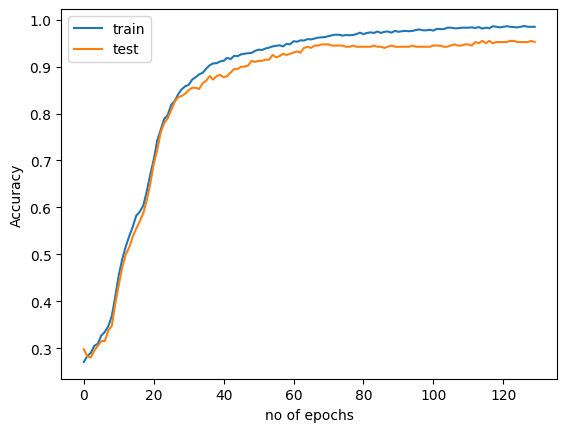

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('no of epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

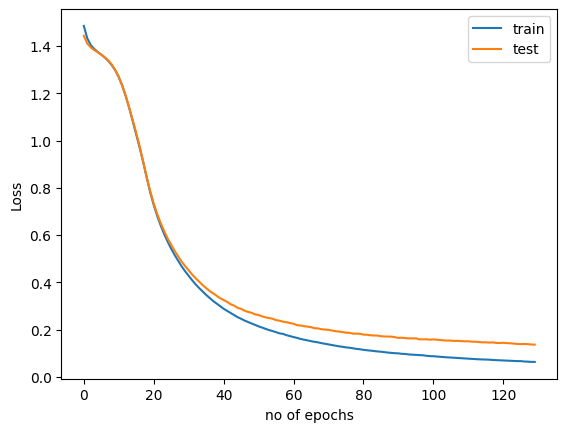

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('no of epochs')
plt.ylabel('Loss')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [ ]:
y_pred = model.predict(X_valid)

pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

test = []
for i in range(len(y_valid)):
    test.append(np.argmax(y_valid[i]))

13/13 [==============================] - 0s 2ms/step


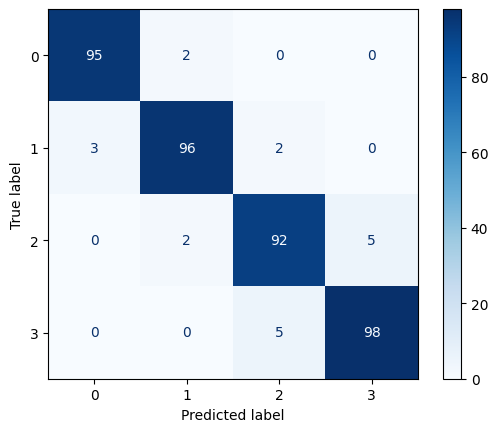

In [ ]:
cm = confusion_matrix(test, pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        97
           1       0.96      0.95      0.96       101
           2       0.93      0.93      0.93        99
           3       0.95      0.95      0.95       103

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



# Dimensionality Reduction

In [ ]:
df = pd.read_csv('/mntDrive/MyDrive/AI/Dimensionality-Reduction/train.csv')

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
X = df.drop('price_range', axis='columns')
y = df['price_range']

In [ ]:
print(X.shape, y.shape)

(2000, 20) (2000,)


In [ ]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [ ]:
model = LogisticRegression(class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=3)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.9591666666666666


 **Principal Component Analysis**

In [ ]:
steps = [('PCA', PCA(n_components=5)), ('m', LogisticRegression(class_weight='balanced'))]
model = Pipeline(steps=steps)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=5, random_state= 5)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.32199999999999995


**Isomap Embedding**

In [ ]:
steps = [('ISO', PCA(n_components=5)), ('m', LogisticRegression(class_weight='balanced'))]
model = Pipeline(steps=steps)

In [ ]:
model = LogisticRegression(class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state= 5)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.9646666666666666
